# **Predicting the Age of Abalone**

## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

## Read CSV file from local Repository

In [ ]:
data_path = '/content/abalone.data'
names_path = '/content/abalone.names'

# Defining column names
columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

# Reading CSV file
df_data = pd.read_csv(data_path, names=columns)

## Checking if the data is loaded correctly by using head , tail and whole data

In [ ]:
df_data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
df_data.tail()  # this will show last 5 data from bottom

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [ ]:
df_data # this will show the entire data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [ ]:
# Check for missing values
missing_values = df_data.isnull().sum()
print(missing_values)

# Confirming if there are no missing values
if missing_values.sum() == 0:
    print("There are no missing values in the dataset.")
else:
    print("There are missing values in the dataset.")

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64
There are no missing values in the dataset.


## Handling the Missing Values

In [ ]:
df_data.dropna(inplace=True) #deoping rows with missing values

## Converting Catagorical data into Numerical data

In [ ]:
# to transform categorical variables into dummy or indicator variables.
# Here Assume 'Sex' as categorical Features
# 'Sex' is considered as categorical features because 'Sex' typically has
# distinct, non-numerical categories such as "Male" and "Female".

df_data = pd.get_dummies(df_data, columns=['Sex'], drop_first=True)

In [ ]:
# droppinng rings varible from the dataframe as it is output varible (target varible)
X = df_data.drop('Rings', axis=1)
# assigned the output varible 'Rings' to 'y'
y = df_data['Rings']
# By printing X we can ensure that 'Rings' has been removed suceesfully
print(X)
print(type(X))

      Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0      0.455     0.365   0.095        0.5140          0.2245          0.1010   
1      0.350     0.265   0.090        0.2255          0.0995          0.0485   
2      0.530     0.420   0.135        0.6770          0.2565          0.1415   
3      0.440     0.365   0.125        0.5160          0.2155          0.1140   
4      0.330     0.255   0.080        0.2050          0.0895          0.0395   
...      ...       ...     ...           ...             ...             ...   
4172   0.565     0.450   0.165        0.8870          0.3700          0.2390   
4173   0.590     0.440   0.135        0.9660          0.4390          0.2145   
4174   0.600     0.475   0.205        1.1760          0.5255          0.2875   
4175   0.625     0.485   0.150        1.0945          0.5310          0.2610   
4176   0.710     0.555   0.195        1.9485          0.9455          0.3765   

      Shell weight  Sex_I  Sex_M  
0   

In [ ]:
# we print y to inspect the target variable and ensure it has been correctly assigned.
print(y)
print(type(y))

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64
<class 'pandas.core.series.Series'>


## feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(X)

print(x)

[[-0.57455813 -0.43214879 -1.06442415 ... -0.63821689 -0.68801788
   1.31667716]
 [-1.44898585 -1.439929   -1.18397831 ... -1.21298732 -0.68801788
   1.31667716]
 [ 0.05003309  0.12213032 -0.10799087 ... -0.20713907 -0.68801788
  -0.75948762]
 ...
 [ 0.6329849   0.67640943  1.56576738 ...  0.49695471 -0.68801788
   1.31667716]
 [ 0.84118198  0.77718745  0.25067161 ...  0.41073914 -0.68801788
  -0.75948762]
 [ 1.54905203  1.48263359  1.32665906 ...  1.84048058 -0.68801788
   1.31667716]]


## Spliting the Dataset

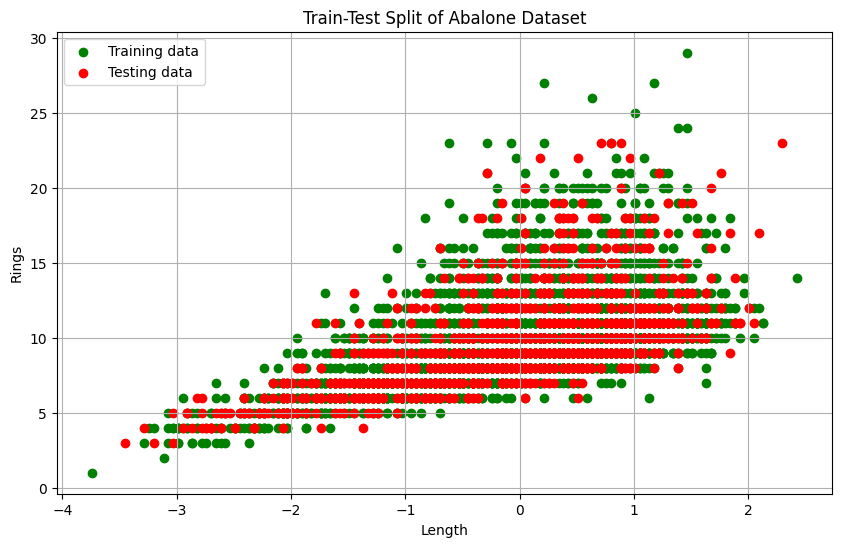

In [ ]:
# we need to split the data into 75% training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Assuming 'Length' was the first column in the original DataFrame, access it using index 0
length_index = 0  # Adjust this index if 'Length' was not the first column

# Scatter plot for training data
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, length_index], y_train, color='green', label='Training data')
plt.scatter(X_test[:, length_index], y_test, color='red', label='Testing data')
plt.xlabel('Length')
plt.ylabel('Rings')
plt.title('Train-Test Split of Abalone Dataset')
plt.legend()
plt.grid(True)
plt.show()

# Support Vector Machines - Hyperparameter Tuning

### Random Search


In [ ]:
import numpy as np
from sklearn.svm import SVR
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [ ]:
# Define the SVR model with RBF kernel
svr_rbf_model = SVR(kernel='rbf')

# Get the model parameters
svr_rbf_model.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
# Define the parameter distribution for hyperparameter tuning
paramdist = {
    'C': [i for i in range(0, 100)],
    'gamma': np.linspace(0, 0.1)
}

In [ ]:
# Perform hyperparameter tuning using RandomizedSearchCV
random_search_cv = RandomizedSearchCV(estimator=svr_rbf_model,
                                      param_distributions=paramdist,
                                      cv=5)
random_search_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVR(),
                   param_distributions={'C': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                              11, 12, 13, 14, 15, 16, 17, 18,
                                              19, 20, 21, 22, 23, 24, 25, 26,
                                              27, 28, 29, ...],
                                        'gamma': array([0.        , 0.00204082, 0.00408163, 0.00612245, 0.00816327,
       0.01020408, 0.0122449 , 0.01428571, 0.01632653, 0.01836735,
       0.02040816, 0.02244898, 0.0244898 , 0.02653061, 0.02857143,
       0.03061224, 0.03265306, 0.03469388, 0.03673469, 0.03877551,
       0.04081633, 0.04285714, 0.04489796, 0.04693878, 0.04897959,
       0.05102041, 0.05306122, 0.05510204, 0.05714286, 0.05918367,
       0.06122449, 0.06326531, 0.06530612, 0.06734694, 0.06938776,
       0.07142857, 0.07346939, 0.0755102 , 0.07755102, 0.07959184,
       0.08163265, 0.08367347, 0.08571429, 0.0877551 , 0.08979592,
       0.09183673, 0.09387755, 0.09591837, 0.09795918, 0.1       ])})

In [ ]:
# Get the best parameters and best score from the random search
best_params = random_search_cv.best_params_
best_score = random_search_cv.best_score_


In [ ]:
# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best  Score:", best_score)

Best Parameters: {'gamma': 0.0489795918367347, 'C': 25}
Best  Score: 0.5612568830306655


In [ ]:
# Train the SVR model with the best parameters obtained from the random search
best_svr_model = SVR(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
best_svr_model.fit(X_train, y_train)

SVR(C=25, gamma=0.0489795918367347)

In [ ]:
# Evaluate the model on the test data
svm_rbf_rnd = SVR(kernel='rbf',C=9000, gamma=0.2)

svm_rbf_rnd.fit(X_train, y_train)
score_svm_rbf_rnd = svm_rbf_rnd.score(X_test, y_test)

print(score_svm_rbf_rnd)

-0.05938084285049916


### Grid Search

In [ ]:
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Define the SVR model with RBF kernel
svr_model = SVR(kernel='rbf')

# Get the model parameters
svr_model.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
# Define the parameter grid for hyperparameter tuning
param_grid = [{'C': [i for i in range(1, 10)],
               'gamma': np.linspace(0, 0.1)}]
param_grid

[{'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
  'gamma': array([0.        , 0.00204082, 0.00408163, 0.00612245, 0.00816327,
         0.01020408, 0.0122449 , 0.01428571, 0.01632653, 0.01836735,
         0.02040816, 0.02244898, 0.0244898 , 0.02653061, 0.02857143,
         0.03061224, 0.03265306, 0.03469388, 0.03673469, 0.03877551,
         0.04081633, 0.04285714, 0.04489796, 0.04693878, 0.04897959,
         0.05102041, 0.05306122, 0.05510204, 0.05714286, 0.05918367,
         0.06122449, 0.06326531, 0.06530612, 0.06734694, 0.06938776,
         0.07142857, 0.07346939, 0.0755102 , 0.07755102, 0.07959184,
         0.08163265, 0.08367347, 0.08571429, 0.0877551 , 0.08979592,
         0.09183673, 0.09387755, 0.09591837, 0.09795918, 0.1       ])}]

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=svr_model,
                           param_grid=param_grid,
                           cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'gamma': array([0.        , 0.00204082, 0.00408163, 0.00612245, 0.00816327,
       0.01020408, 0.0122449 , 0.01428571, 0.01632653, 0.01836735,
       0.02040816, 0.02244898, 0.0244898 , 0.02653061, 0.02857143,
       0.03061224, 0.03265306, 0.03469388, 0.03673469, 0.03877551,
       0.04081633, 0.04285714, 0.04489796, 0.04693878, 0.04897959,
       0.05102041, 0.05306122, 0.05510204, 0.05714286, 0.05918367,
       0.06122449, 0.06326531, 0.06530612, 0.06734694, 0.06938776,
       0.07142857, 0.07346939, 0.0755102 , 0.07755102, 0.07959184,
       0.08163265, 0.08367347, 0.08571429, 0.0877551 , 0.08979592,
       0.09183673, 0.09387755, 0.09591837, 0.09795918, 0.1       ])}])

In [ ]:
print(grid_search.best_params_)

{'C': 9, 'gamma': 0.05510204081632654}


In [ ]:
score_rbf_grid=print(grid_search.best_score_)
score_rbf_grid

0.561711353072861


In [ ]:
svm_rbf = SVR(kernel='rbf',C=900, gamma=0.01)

svm_rbf.fit(X_train, y_train)
score_svm_rbf_grid = svm_rbf.score(X_test, y_test)

print(score_svm_rbf_grid)

0.5759845489697898


# Desicion tree

In [ ]:
# Instantiate the Decision Tree Regressor
decision_tree = DecisionTreeRegressor(random_state=42)

# Train the model
decision_tree.fit(X_train, y_train)

# predicting on testing data and training data
y_train_pred = decision_tree.predict(X_train)
y_test_pred = decision_tree.predict(X_test)

# calculating the performance
mse_test = mean_squared_error(y_test, y_test_pred) # we will be taking this value because this is the target value
mse_train = mean_squared_error(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)  # we will be  taking this value because this is the target value
r2_train = r2_score(y_train, y_train_pred)
mae = mean_absolute_error(y_test, y_test_pred)

# printing values
print("Decision Tree")
print(f'Mean Square Error (MSE train): {mse_train}')
print(f'Mean Square Error  (MSE test): {mse_test}')
print(f'R-Squared Error    (R2 train): {r2_train}')
print(f'R-Squared Error     (R2 test): {r2_test}')
print(f'Mean absolute error (MAE) :%.2f'%mae)

Decision Tree
Mean Square Error (MSE train): 0.0
Mean Square Error  (MSE test): 8.574162679425838
R-Squared Error    (R2 train): 1.0
R-Squared Error     (R2 test): 0.1665358147835212
Mean absolute error (MAE) :2.02


# Hyperparameter tuning

### Random search

In [ ]:
hyp_dectree = DecisionTreeRegressor(random_state=42)
hyp_dectree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [ ]:
# the hyperparameter to tune as max_depth
hyp_param_dict = [{'max_depth' : [i for i in range(0,20)]}]
hyp_param_dict

[{'max_depth': [0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19]}]

In [ ]:
decision_tree_rnd = RandomizedSearchCV(estimator = hyp_dectree,
                   param_distributions = hyp_param_dict,
                   cv=5)

In [ ]:
decision_tree_rnd.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
                   param_distributions=[{'max_depth': [0, 1, 2, 3, 4, 5, 6, 7,
                                                       8, 9, 10, 11, 12, 13, 14,
                                                       15, 16, 17, 18, 19]}])

In [ ]:
decision_tree_rnd.best_params_

{'max_depth': 5}

In [ ]:
decision_tree_rnd.best_estimator_

DecisionTreeRegressor(max_depth=5, random_state=42)

In [ ]:
print(f'best papameters:{decision_tree_rnd.best_params_}')
print(f'best score:{decision_tree_rnd.best_score_}')

best papameters:{'max_depth': 5}
best score:0.47112797516086913


In [ ]:
dt_rand = DecisionTreeRegressor(max_depth=5,random_state=42)
dt_rand.fit(X_train,y_train)

score_dt_rand = dt_rand.score(X_test,y_test)
print(score_dt_rand)

0.4937770681995517


### Grid search

In [ ]:
hyp_dectree = DecisionTreeRegressor(random_state=42)
hyp_dectree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [ ]:
hyp_param_dict = [{'max_depth': [i for i in range(0, 20)],
                  'max_features': [i for i in range(1, 8)],
                  'max_leaf_nodes': [None, 10, 20, 30, 40, 50]}]
hyp_param_dict

[{'max_depth': [0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19],
  'max_features': [1, 2, 3, 4, 5, 6, 7],
  'max_leaf_nodes': [None, 10, 20, 30, 40, 50]}]

In [ ]:
decision_tree = GridSearchCV(estimator = hyp_dectree,
                   param_grid = hyp_param_dict,
                   cv=5)

In [ ]:
decision_tree.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
210 fits failed out of a total of 4200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
210 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _va

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid=[{'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                        12, 13, 14, 15, 16, 17, 18, 19],
                          'max_features': [1, 2, 3, 4, 5, 6, 7],
                          'max_leaf_nodes': [None, 10, 20, 30, 40, 50]}])

In [ ]:
decision_tree.best_params_

{'max_depth': 7, 'max_features': 3, 'max_leaf_nodes': 40}

In [ ]:
decision_tree.best_estimator_

DecisionTreeRegressor(max_depth=7, max_features=3, max_leaf_nodes=40,
                      random_state=42)

In [ ]:
decision_tree.best_params_
decision_tree.best_score_

0.48016460355736346

In [ ]:
dt = DecisionTreeRegressor(max_depth=7,max_features=3, max_leaf_nodes=45, random_state=42)
dt.fit(X_train,y_train)
score_dt_grid = dt.score(X_test,y_test)
print(score_dt_grid)

0.45304304343514323


# Random Forest

In [ ]:
# Instantiate the Random Forest Regressor
random_forest = RandomForestRegressor(random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# prediction on testing data
y_test_pred = random_forest.predict(X_test)

# calculating performace metrics
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# printing values
print("Random Forest")
print(f'Mean Square Error (MSE test): {mse_test}')
print(f'R-Squared Error    (R2 test): {r2_test}')
print(f'Mean absolute error (MAE) :%.2f'%mae_test)


Random Forest
Mean Square Error (MSE test): 4.815609377990431
R-Squared Error    (R2 test): 0.5318915564573357
Mean absolute error (MAE) :1.57


### Random search

In [ ]:
hyp_random_forest = RandomForestRegressor(random_state=42)
hyp_random_forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
hyp_grid = [{'n_estimators' : [i for i in range(0,10)]},
                  {'max_depth':[j for j in range(10)]}]
hyp_grid

[{'n_estimators': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]},
 {'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}]

In [ ]:
randomforest_rd = RandomizedSearchCV( estimator = hyp_random_forest,
                                   param_distributions = hyp_grid,
                                    cv=5)

In [ ]:
randomforest_rd.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions=[{'n_estimators': [0, 1, 2, 3, 4, 5, 6,
                                                          7, 8, 9]},
                                        {'max_depth': [0, 1, 2, 3, 4, 5, 6, 7,
                                                       8, 9]}])

In [ ]:
randomforest_rd.best_params_

{'max_depth': 8}

In [ ]:
randomforest_rd.best_estimator_

RandomForestRegressor(max_depth=8, random_state=42)

In [ ]:
print(f'best papameters:{randomforest_rd.best_params_}')
print(f'best score:{randomforest_rd.best_score_}')

best papameters:{'max_depth': 8}
best score:0.5495974380150866


In [ ]:
rand_for_rd = RandomForestRegressor(max_depth = 9,n_estimators =1000,random_state=42)
rand_for_rd.fit(X_train,y_train)

score_rand_for_rd = rand_for_rd.score(X_test,y_test)
print(score_rand_for_rd)

0.5464172433309769


### Grid Search

In [ ]:
hyp_random_forest = RandomForestRegressor(random_state=42)
hyp_random_forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
hyp_grid = [{'n_estimators' : [i for i in range(10,200,10)]},
                  {'max_depth':[j for j in range(10)]}]
hyp_grid

[{'n_estimators': [10,
   20,
   30,
   40,
   50,
   60,
   70,
   80,
   90,
   100,
   110,
   120,
   130,
   140,
   150,
   160,
   170,
   180,
   190]},
 {'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}]

In [ ]:
grid_search = GridSearchCV(estimator = hyp_random_forest,
                          param_grid = hyp_grid,
                          cv = 5)

In [ ]:
grid_search.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 145.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                           100, 110, 120, 130, 140, 150, 160,
                                           170, 180, 190]},
                         {'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}])

In [ ]:
grid_search.best_params_

{'max_depth': 9}

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=9, random_state=42)

In [ ]:
grid_search.best_score_

0.5496856459913332

In [ ]:
dt_rand= RandomForestRegressor(max_depth=9,n_estimators=200,random_state=42)
dt_rand.fit(X_train,y_train)

RandomForestRegressor(max_depth=9, n_estimators=200, random_state=42)

In [ ]:
score_rand_grid = dt_rand.score(X_test,y_test)
print(score_rand_grid)

0.543162589973887


# Adaboost

### Random search

In [ ]:
hyp_adaboost = AdaBoostRegressor(random_state=42)
hyp_adaboost.get_params()

{'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 50,
 'random_state': 42}

In [ ]:
# the hyperparameters to tune as 'learning_rate' and 'n_estimators'
hyp_random = [{'learning_rate': np.linspace(0.1,1 ,10),
                'n_estimators': [j for j in range(10,101,10)]}]
hyp_random

[{'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
  'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}]

In [ ]:
ada_boost = RandomizedSearchCV(estimator = hyp_adaboost,
                        param_distributions = hyp_random,
                        cv=5)
ada_boost.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(random_state=42),
                   param_distributions=[{'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                         'n_estimators': [10, 20, 30, 40, 50,
                                                          60, 70, 80, 90,
                                                          100]}])

In [ ]:
ada_boost.best_params_

{'n_estimators': 60, 'learning_rate': 0.1}

In [ ]:
ada_boost.best_score_

0.42611326175553427

In [ ]:
ada_boost_rnd = AdaBoostRegressor(n_estimators = 29,learning_rate=0.30000000000000004)
ada_boost_rnd.fit(X_train,y_train)

score_ada_boost_rnd = ada_boost_rnd.score(X_test,y_test)
print(score_ada_boost_rnd)

0.42692015560133667


### Grid Search

In [ ]:
hyp_adaboost = AdaBoostRegressor(random_state=42)
hyp_adaboost.get_params()

{'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 50,
 'random_state': 42}

In [ ]:
#  hyperparameters to tune as 'learning_rate' and 'n_estimators'
hyp_gridsearch = [{'learning_rate': np.linspace(0.1,1 ,10),
                'n_estimators': [j for j in range(10,101,10)]}]
hyp_gridsearch

[{'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
  'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}]

In [ ]:
ada_boost = GridSearchCV(estimator = hyp_adaboost,
                        param_grid = hyp_gridsearch,
                        cv=5)

In [ ]:
ada_boost.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(random_state=42),
             param_grid=[{'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                          'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                           100]}])

In [ ]:
print(f'best papameters:{ada_boost.best_params_}')
print(f'best score:{ada_boost.best_score_}')

best papameters:{'learning_rate': 0.30000000000000004, 'n_estimators': 10}
best score:0.4445099866824263


In [ ]:
ada_boost_ = AdaBoostRegressor(learning_rate = 0.44,n_estimators=10)
ada_boost_.fit(X_train,y_train)

score_adaboost_grid = ada_boost_.score(X_test,y_test)
print(score_adaboost_grid)

0.4656148970772458


# Gradient Boosting

### Random search

In [ ]:
hyp_gradient_boost = GradientBoostingRegressor(random_state=42)
hyp_gradient_boost.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
hyp_random = [{'max_depth' : [i for i in range(1,20)],
                'n_estimators' : [j for j in range(1,100,10)]}]
hyp_random

[{'max_depth': [1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19],
  'n_estimators': [1, 11, 21, 31, 41, 51, 61, 71, 81, 91]}]

In [ ]:
ran_search = GridSearchCV(estimator = hyp_gradient_boost,
                       param_grid = hyp_random,
                       cv =5)

In [ ]:
ran_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                        13, 14, 15, 16, 17, 18, 19],
                          'n_estimators': [1, 11, 21, 31, 41, 51, 61, 71, 81,
                                           91]}])

In [ ]:
ran_search.best_params_

{'max_depth': 4, 'n_estimators': 61}

In [ ]:
ran_search .best_score_

0.5584925376653727

In [ ]:
grd_boost_rnd = GradientBoostingRegressor(n_estimators = 81,max_depth = 4)
grd_boost_rnd.fit(X_train,y_train)

score_grd_boost_rnd = grd_boost_rnd.score(X_test,y_test)
print(score_grd_boost_rnd)

0.5357939616486046


### Grid Search

In [ ]:
hyp_gradient_boost = GradientBoostingRegressor(random_state=42)
hyp_gradient_boost.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# hyperparameters to tune as 'max_depth' and 'n_estimators'
hyp_gridsearch = [{'max_depth' : [i for i in range(1,10)],
                'n_estimators' : [j for j in range(1,100,10)]}]
hyp_gridsearch

[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
  'n_estimators': [1, 11, 21, 31, 41, 51, 61, 71, 81, 91]}]

In [ ]:
grid_search = GridSearchCV(estimator=hyp_gradient_boost,
                       param_grid=hyp_gridsearch,
                       cv=5)

In [ ]:
grid_search.fit(  X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'n_estimators': [1, 11, 21, 31, 41, 51, 61, 71, 81,
                                           91]}])

In [ ]:
grid_search.best_params_

{'max_depth': 4, 'n_estimators': 61}

In [ ]:
grid_search.best_score_

0.5584925376653727

In [ ]:
grd_boost = GradientBoostingRegressor(max_depth = 4, n_estimators = 70)
grd_boost.fit(X_train,y_train)

score_grdboost_grid = grd_boost.score(X_test,y_test)
print(score_grdboost_grid)

0.5344995986814269


# Results

In [ ]:
#Results after Hyperparameter Tuning
methods = ('SVM(rbf)', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting')
d_results_plot = {
    'BeforeHyp': [ 0.550,0.144 ,0.533,0.124,0.539],
    'AfterHyp': [score_svm_rbf_grid, score_dt_grid, score_rand_grid, score_adaboost_grid, score_grdboost_grid]
}

In [ ]:
# Creating a DataFrame
data = {
    'Method': methods,
    'BeforeHyp': d_results_plot['BeforeHyp'],
    'AfterHyp': d_results_plot['AfterHyp']
}
df = pd.DataFrame(data)

# Display the table
print(df)

              Method  BeforeHyp  AfterHyp
0           SVM(rbf)      0.550  0.575985
1      Decision Tree      0.144  0.453043
2      Random Forest      0.533  0.543163
3           AdaBoost      0.124  0.465615
4  Gradient Boosting      0.539  0.534500


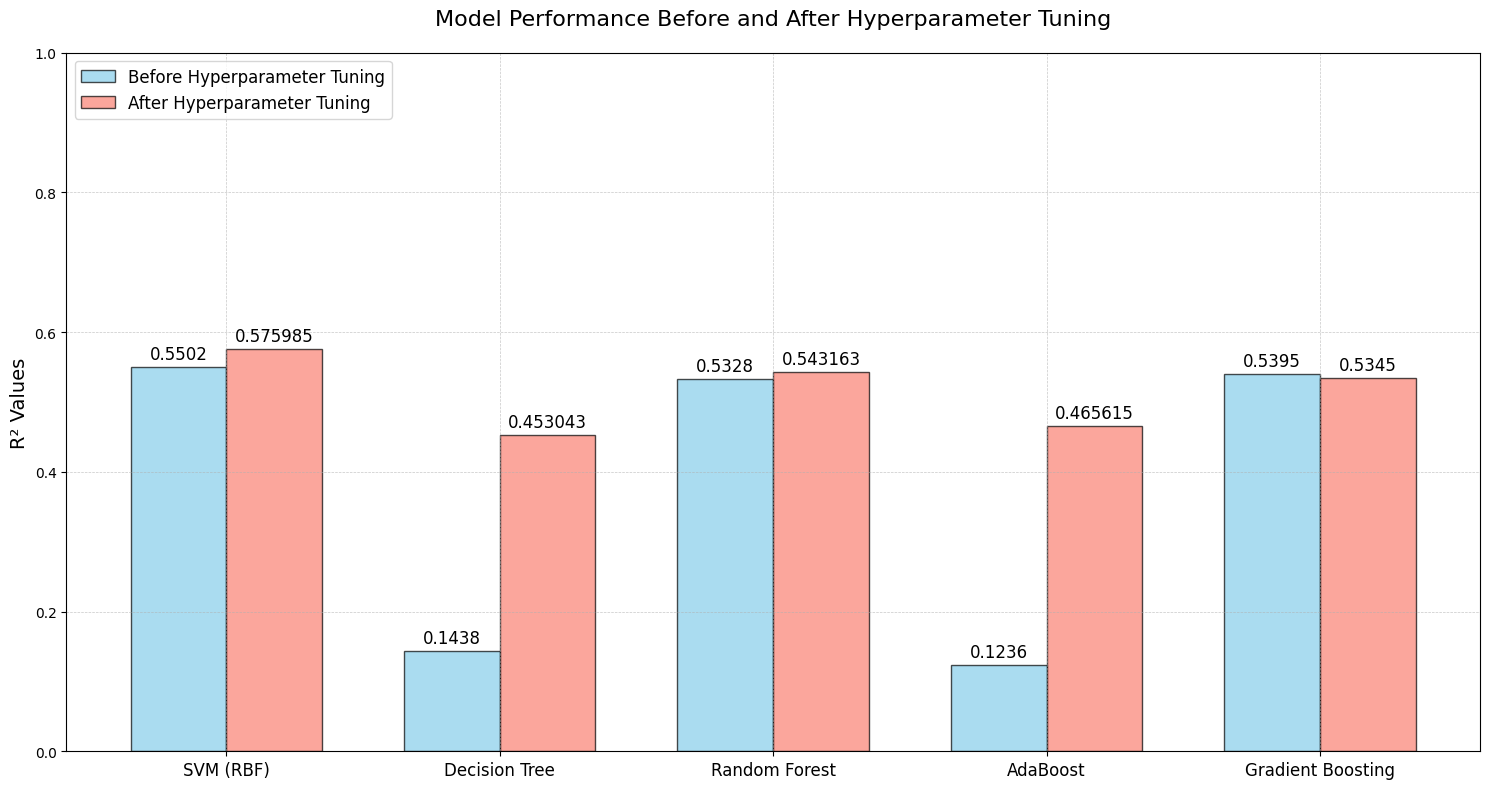

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Results after Hyperparameter Tuning
methods = ['SVM (RBF)', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting']
d_results_plot = {
    'Before Hyperparameter Tuning': [0.5502, 0.1438, 0.5328, 0.1236, 0.5395],
    'After Hyperparameter Tuning': [score_svm_rbf_grid, score_dt_grid, score_rand_grid, score_adaboost_grid, score_grdboost_grid]
}

X = np.arange(len(methods))
width = 0.35
multiplier = 0

fig, ax = plt.subplots(figsize=(15, 8))

# Colors for bars
colors = {'Before Hyperparameter Tuning': 'skyblue', 'After Hyperparameter Tuning': 'salmon'}

for attribute, measurement in d_results_plot.items():
    offset = width * multiplier
    rects = ax.bar(X + offset, measurement, width, label=attribute, color=colors[attribute], edgecolor='black', alpha=0.7)
    ax.bar_label(rects, padding=3, fontsize=12)
    multiplier += 1


ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Setting labels and title
ax.set_ylabel('R² Values', fontsize=14)
ax.set_title('Model Performance Before and After Hyperparameter Tuning', fontsize=16, pad=20)
ax.set_xticks(X + width / 2)
ax.set_xticklabels(methods, fontsize=12)
ax.legend(loc='upper left', fontsize=12)
ax.set_ylim(0, 1)


ax.margins(y=0.1)


plt.tight_layout()


plt.savefig("output1.jpg", dpi=300, bbox_inches='tight')
plt.show()



# Feature Reduction

In [ ]:
!pip install scikit-learn
from sklearn.decomposition import PCA

pca = PCA(n_components=min(X_train.shape[0], X_train.shape[1]))  # Assuming X_train has shape (n_samples, n_features)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print(X_train_pca.shape)
print(X_test_pca.shape)

(3132, 9)
(1045, 9)


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Assuming you want to use a Support Vector Regressor
hpt_svm_reg = SVR()

# Now you can use hpt_svm_reg in the GridSearchCV
grid_search = GridSearchCV(estimator = hpt_svm_reg,
                          param_grid = param_grid,
                          cv = 5)

In [ ]:
grid_search.fit(X_train_pca,y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'gamma': array([0.        , 0.00204082, 0.00408163, 0.00612245, 0.00816327,
       0.01020408, 0.0122449 , 0.01428571, 0.01632653, 0.01836735,
       0.02040816, 0.02244898, 0.0244898 , 0.02653061, 0.02857143,
       0.03061224, 0.03265306, 0.03469388, 0.03673469, 0.03877551,
       0.04081633, 0.04285714, 0.04489796, 0.04693878, 0.04897959,
       0.05102041, 0.05306122, 0.05510204, 0.05714286, 0.05918367,
       0.06122449, 0.06326531, 0.06530612, 0.06734694, 0.06938776,
       0.07142857, 0.07346939, 0.0755102 , 0.07755102, 0.07959184,
       0.08163265, 0.08367347, 0.08571429, 0.0877551 , 0.08979592,
       0.09183673, 0.09387755, 0.09591837, 0.09795918, 0.1       ])}])

In [ ]:
newscore = grid_search.score(X_test_pca,y_test)
print(newscore)

0.5698455708703736


# Feature Selection

In [ ]:
from sklearn.feature_selection import SelectPercentile, f_regression # Import the necessary class

fs = SelectPercentile(score_func=f_regression,percentile=50)
X_train_fs = fs.fit_transform(X_train,y_train)
X_test_fs = fs.transform(X_test)

print(X_train_fs.shape)
print(X_test_fs.shape)

(3132, 4)
(1045, 4)


In [ ]:
fs.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x6'], dtype=object)

In [ ]:
grid_search = GridSearchCV(estimator = hpt_svm_reg,
                          param_grid = param_grid,
                          cv = 5)
grid_search.fit(X_train_fs,y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'gamma': array([0.        , 0.00204082, 0.00408163, 0.00612245, 0.00816327,
       0.01020408, 0.0122449 , 0.01428571, 0.01632653, 0.01836735,
       0.02040816, 0.02244898, 0.0244898 , 0.02653061, 0.02857143,
       0.03061224, 0.03265306, 0.03469388, 0.03673469, 0.03877551,
       0.04081633, 0.04285714, 0.04489796, 0.04693878, 0.04897959,
       0.05102041, 0.05306122, 0.05510204, 0.05714286, 0.05918367,
       0.06122449, 0.06326531, 0.06530612, 0.06734694, 0.06938776,
       0.07142857, 0.07346939, 0.0755102 , 0.07755102, 0.07959184,
       0.08163265, 0.08367347, 0.08571429, 0.0877551 , 0.08979592,
       0.09183673, 0.09387755, 0.09591837, 0.09795918, 0.1       ])}])

In [ ]:
score_fs = grid_search.score(X_test_fs,y_test)
print(score_fs)

0.4589022715343374


# Data Visualization

In [ ]:
from sklearn.manifold import TSNE
tsne_data = TSNE(n_components=2,init='pca',learning_rate='auto')
X_train_tsne = tsne_data.fit_transform(X_train)
print(X_train_tsne.shape)

(3132, 2)


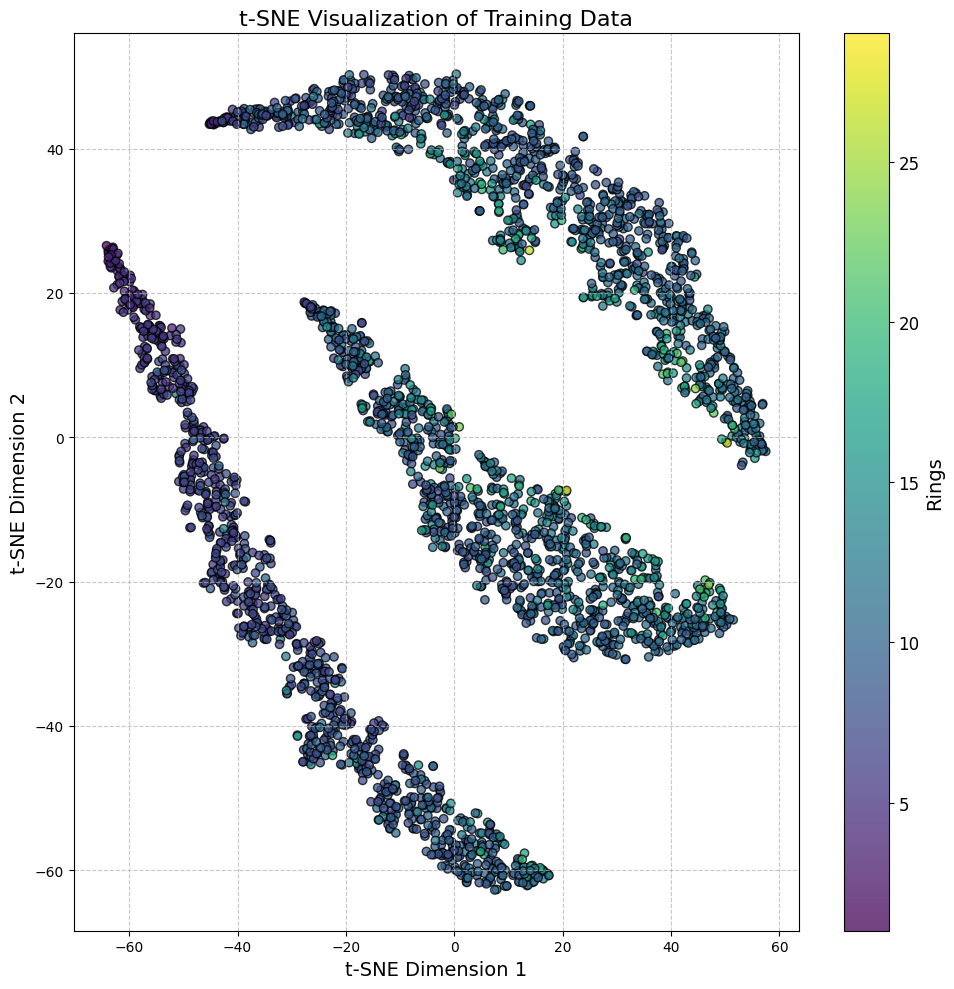

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()

# Scatter plot with improved visualization
scatter = ax.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap='viridis', marker='o', edgecolor='k', alpha=0.75)

# Adding labels and title
ax.set_xlabel("t-SNE Dimension 1", fontsize=14)
ax.set_ylabel("t-SNE Dimension 2", fontsize=14)
ax.set_title("t-SNE Visualization of Training Data", fontsize=16)

# Adding grid lines
ax.grid(True, linestyle='--', alpha=0.7)

# Adding colorbar
colorbar = plt.colorbar(scatter)
colorbar.set_label('Rings', fontsize=14)
colorbar.ax.tick_params(labelsize=12)

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the plot
plt.show()

